# Importar Librerías

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# Código Inicial

In [ ]:

def show_images_with_predictions(images, predictions):
  for i in range(len(images)):
      plt.figure()
      plt.imshow(images[i])
      if predictions[i] >= 0.1:
          plt.title(f"Predicción: Es un coche ({predictions[i][0]:.4f})")
      else:
          plt.title(f"Predicción: No es un coche ({predictions[i][0]:.4f})")
      plt.xlabel("Imagen")
      plt.show()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

car_indices = np.where(train_labels == 1)[0][:2000]
non_car_indices = np.where(train_labels != 1)[0][:15000]
selected_indices = np.concatenate([car_indices, non_car_indices])

np.random.shuffle(selected_indices)

train_images = train_images[selected_indices]
train_labels = train_labels[selected_indices]
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = np.array([1 if label == 1 else 0 for label in
train_labels])  # 1 si es un coche, 0 si no lo es

test_labels = np.array([1 if label == 1 else 0 for label in
test_labels])  # 1 si es un coche, 0 si no lo es

print(len(train_labels))

print(len(test_labels))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
17000
10000


In [ ]:
# Contar cuántas imágenes hay de coches y cuántas de otras clases en el conjunto de entrenamiento
car_count_train = np.sum(train_labels == 1)
non_car_count_train = np.sum(train_labels == 0)

# Contar cuántas imágenes hay de coches y cuántas de otras clases en el conjunto de prueba
car_count_test = np.sum(test_labels == 1)
non_car_count_test = np.sum(test_labels == 0)

# Imprimir la distribución
print(f'Distribución en el conjunto de entrenamiento: {car_count_train} coches, {non_car_count_train} no coches')
print(f'Distribución en el conjunto de prueba: {car_count_test} coches, {non_car_count_test} no coches')


Distribución en el conjunto de entrenamiento: 2000 coches, 15000 no coches
Distribución en el conjunto de prueba: 1000 coches, 9000 no coches


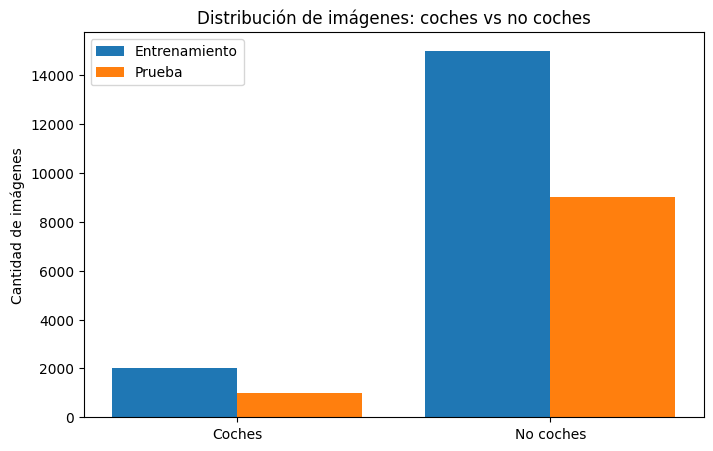

In [ ]:
# Crear una gráfica de barras para mostrar la distribución
labels = ['Coches', 'No coches']
train_counts = [car_count_train, non_car_count_train]
test_counts = [car_count_test, non_car_count_test]

x = np.arange(len(labels))  # Posiciones para las etiquetas

# Graficar la distribución de los datos en el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 5))

plt.bar(x - 0.2, train_counts, 0.4, label='Entrenamiento')
plt.bar(x + 0.2, test_counts, 0.4, label='Prueba')

plt.xticks(x, labels)
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de imágenes: coches vs no coches')
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Definir el modelo de la red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoid para obtener valores entre 0 y 1
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=1, batch_size=64, validation_data=(test_images, test_labels))

266/266 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - accuracy: 0.8746 - loss: 0.3600 - val_accuracy: 0.9194 - val_loss: 0.2023


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de pruebas: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9191 - loss: 0.1994
Precisión en el conjunto de pruebas: 0.9193999767303467


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Precisión en el conjunto de pruebas: 0.9193999767303467


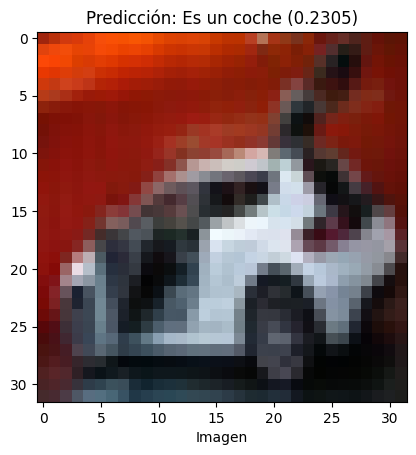

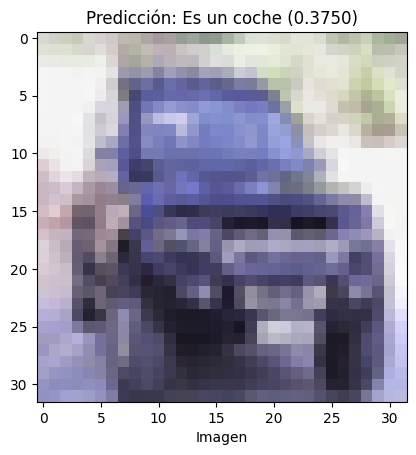

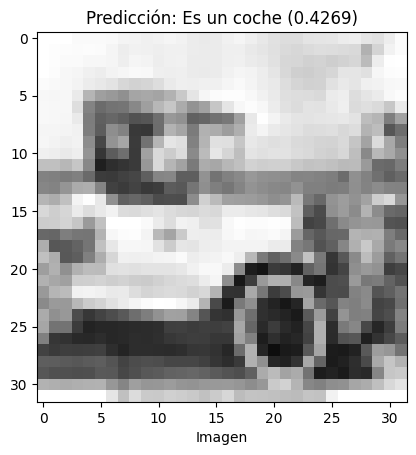

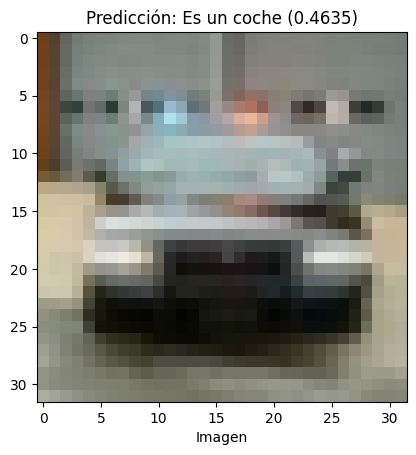

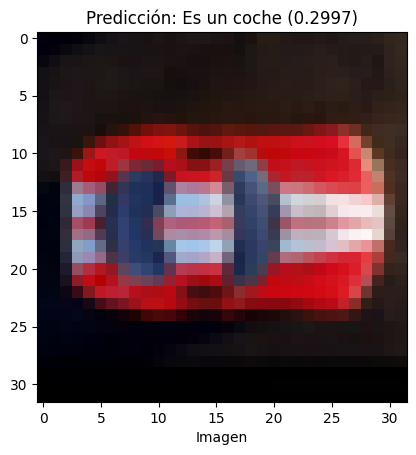

In [ ]:
car_indices = [i for i, label in enumerate(test_labels) if label == 1][:5]
car_images = [test_images[i] for i in car_indices]
car_predictions = model.predict(np.array(car_images))
print(f'Precisión en el conjunto de pruebas: {test_accuracy}')
show_images_with_predictions(car_images, car_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


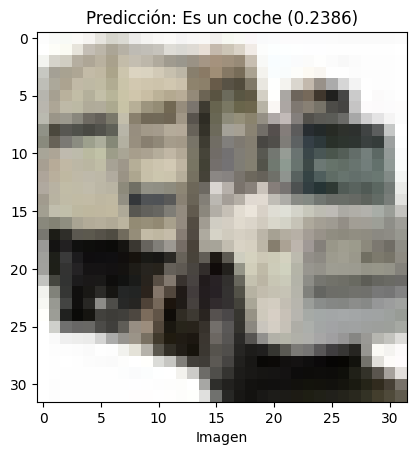

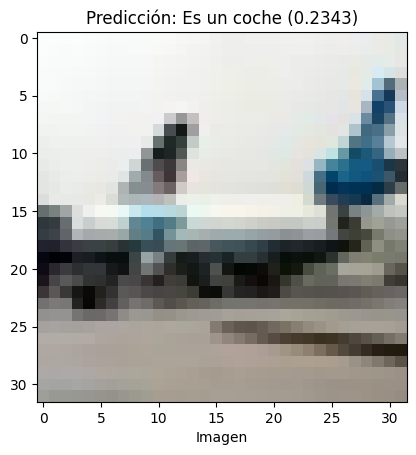

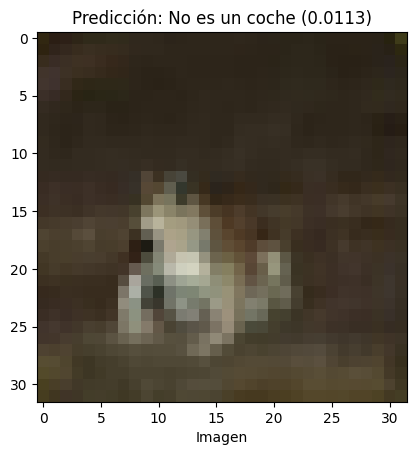

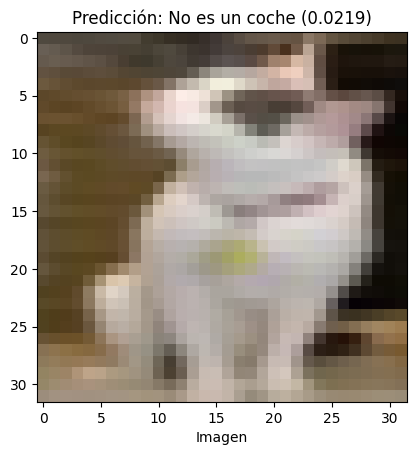

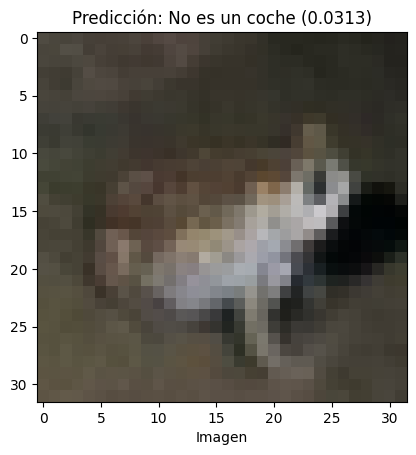

In [ ]:
non_car_indices = [i for i, label in enumerate(test_labels) if label != 1]
random_non_car_indices = random.sample(non_car_indices, 5)
non_car_images = [test_images[i] for i in random_non_car_indices]
non_car_predictions = model.predict(np.array(non_car_images))
show_images_with_predictions(non_car_images, non_car_predictions)

In [ ]:
model.save("modelo_entrenado_coche.keras")
print("Modelo guardado exitosamente como 'modelo_entrenado_coche.keras'")

Modelo guardado exitosamente como 'modelo_entrenado_coche.keras'


# Modelo para diferenciar entre coche y no coche

In [2]:
def show_images_with_predictions(images, predictions, columns=3):
    rows = math.ceil(len(images) / columns)  # Calcula cuántas filas se necesitan
    fig, axs = plt.subplots(rows, columns, figsize=(columns * 3, rows * 3))  # Ajusta el tamaño
    axs = axs.flatten()  # Convierte axs en una lista para acceder más fácilmente a los subplots

    for i in range(len(images)):
        axs[i].imshow(images[i])  # Muestra cada imagen en su subplot correspondiente
        if predictions[i] >= 0.1:
            axs[i].set_title(f"Es un coche ({predictions[i][0]:.4f})")
        else:
            axs[i].set_title(f"No es un coche ({predictions[i][0]:.4f})")
        axs[i].set_xlabel("Imagen")
        axs[i].axis('off')  # Elimina los ejes de las imágenes

    # Si hay subplots sobrantes, se eliminan
    for i in range(len(images), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()  # Ajusta el espaciado entre subplots
    plt.show()


In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

car_indices = np.where(train_labels == 1)[0][:5000]
non_car_indices = np.where(train_labels != 1)[0][:15000]

selected_indices = np.concatenate([car_indices, non_car_indices])
np.random.shuffle(selected_indices)

train_images = train_images[selected_indices]
train_labels = train_labels[selected_indices]

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = np.array([1 if label == 1 else 0 for label in train_labels]) # 1 si es un coche, 0 si no lo es
test_labels = np.array([1 if label == 1 else 0 for label in test_labels]) # 1 si es un coche, 0 si no lo es

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# Definir el modelo de la red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Capa de salida con activación sigmoid para obtener valores entre 0 y 1
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Entrenar el modelo y guardar el historial
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7894 - loss: 0.4501 - val_accuracy: 0.9247 - val_loss: 0.1786
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8901 - loss: 0.2605 - val_accuracy: 0.9450 - val_loss: 0.1408
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9144 - loss: 0.2159 - val_accuracy: 0.9228 - val_loss: 0.1994
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9310 - loss: 0.1870 - val_accuracy: 0.9492 - val_loss: 0.1286
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9394 - loss: 0.1559 - val_accuracy: 0.9501 - val_loss: 0.1342
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9470 - loss: 0.1363 - val_accuracy: 0.9441 - val_loss: 0.1410
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1210 - val_accuracy: 0.9621 - val_loss: 0.1055
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9648 - loss: 0.0998 - val_accuracy: 0

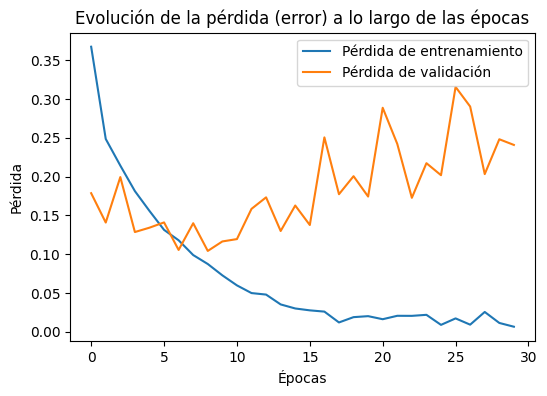

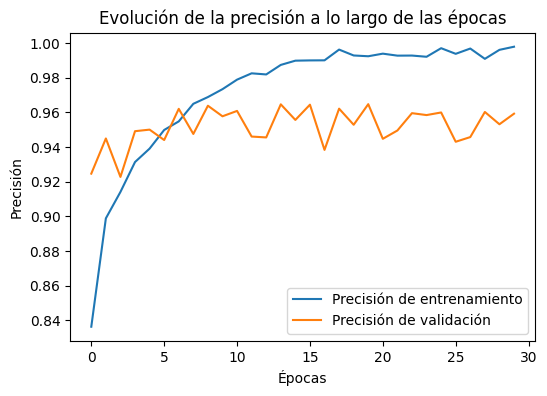

In [8]:
%matplotlib inline

# Gráfica de la pérdida (error)
plt.figure(figsize=(6, 4))  # Figura más pequeña para la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida (error) a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de la precisión (accuracy)
plt.figure(figsize=(6, 4))  # Figura más pequeña para la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de pruebas: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.2354
Precisión en el conjunto de pruebas: 0.9592999815940857


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


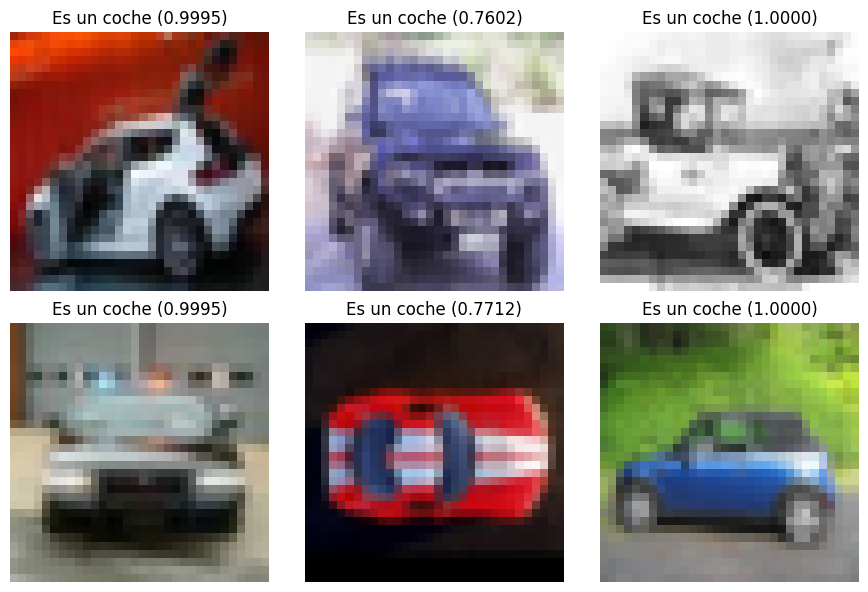

In [ ]:
car_indices = [i for i, label in enumerate(test_labels) if label == 1][:6]
car_images = [test_images[i] for i in car_indices]
car_predictions = model.predict(np.array(car_images))
show_images_with_predictions(car_images, car_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


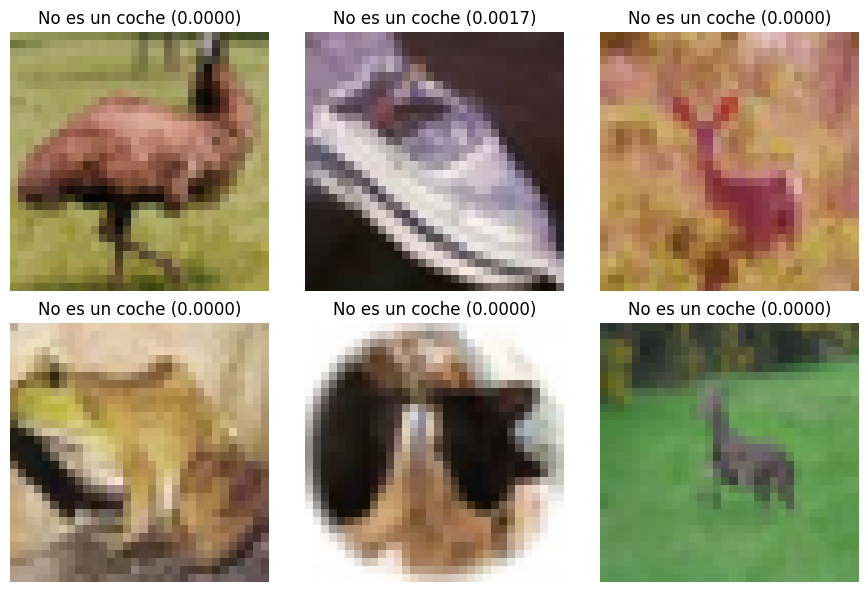

In [ ]:
non_car_indices = [i for i, label in enumerate(test_labels) if label != 1]
random_non_car_indices = random.sample(non_car_indices, 6)
non_car_images = [test_images[i] for i in random_non_car_indices]
non_car_predictions = model.predict(np.array(non_car_images))
show_images_with_predictions(non_car_images, non_car_predictions)

In [10]:
model.save("cars_model.keras")
print("Modelo guardado exitosamente como 'cars_models.keras'")

Modelo guardado exitosamente como 'cars_models.keras'


# Transfer Learning con Camiones

In [11]:
# Test if the model loads correctly
try:
    cars_model = tf.keras.models.load_model('./cars_model.keras')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Failed to load model: {e}")


Model loaded successfully.


In [12]:
# Evaluate the restored model
test_loss, test_accuracy = cars_model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de pruebas: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.2354
Precisión en el conjunto de pruebas: 0.9592999815940857


## Hacer el reentrenamiento

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# Función para mostrar imágenes con predicciones
def show_images_with_predictions(images, predictions, columns=3):
    class_names = ["Otras clases", "Coche", "Camión"]
    rows = math.ceil(len(images) / columns)
    fig, axs = plt.subplots(rows, columns, figsize=(columns * 3, rows * 3))
    axs = axs.flatten()

    for i in range(len(images)):
        axs[i].imshow(images[i])
        pred_class = np.argmax(predictions[i])  # Clase con mayor probabilidad
        confidence = predictions[i][pred_class]
        axs[i].set_title(f"{class_names[pred_class]} ({confidence:.4f})")
        axs[i].axis('off')

    for i in range(len(images), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Cargar los datos CIFAR-10 y preprocesarlos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


# Filtrar imágenes de coches, camiones y otras clases
car_indices = np.where(train_labels == 1)[0][:5000]   # 5000 coches
truck_indices = np.where(train_labels == 9)[0][:5000] # 5000 camiones
other_indices = np.where((train_labels != 1) & (train_labels != 9))[0][:10000]  # 10000 de otras clases

selected_indices = np.concatenate([car_indices, truck_indices, other_indices])
np.random.shuffle(selected_indices)

train_images = train_images[selected_indices] / 255.0
train_labels = train_labels[selected_indices]

# Convertir etiquetas: 1 -> coche, 9 -> camión, otras -> otras clases (0)
train_labels = np.array([1 if label == 1 else (2 if label == 9 else 0) for label in train_labels])

# Convertir las etiquetas a formato categórico
train_labels = to_categorical(train_labels, num_classes=3)
test_labels = np.array([1 if label == 1 else (2 if label == 9 else 0) for label in test_labels])
test_labels = to_categorical(test_labels, num_classes=3)

# Cargar el modelo base
base_model = load_model("./cars_model.keras")


In [14]:
# Congelar las capas del modelo base excepto la última capa
for layer in base_model.layers[:-1]:
    layer.trainable = False

# Modificar el modelo para la clasificación de tres clases
model = Sequential(base_model.layers[:-1])  # Copiar todas las capas menos la última capa de salida
model.add(Dense(3, activation='softmax'))   # Nueva capa de salida para tres clases

# Compilar el modelo con una configuración de clasificación multiclase
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,507 (478.55 KB)

 Trainable params: 195 (780.00 B)

 Non-trainable params: 121,920 (476.25 KB)

 Optimizer params: 392 (1.54 KB)

In [16]:
# Entrenar el modelo en el conjunto de datos actualizado
model.fit(train_images, train_labels, epochs=20, batch_size=64,
          validation_data=(test_images, test_labels))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7674 - loss: 0.6581 - val_accuracy: 0.7469 - val_loss: 54.5393
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.3752 - val_accuracy: 0.7285 - val_loss: 68.1728
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.3495 - val_accuracy: 0.7513 - val_loss: 66.9805
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.3459 - val_accuracy: 0.7567 - val_loss: 68.1059
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8586 - loss: 0.3405 - val_accuracy: 0.7380 - val_loss: 74.4679
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8664 - loss: 0.3256 - val_accuracy: 0.7366 - val_loss: 75.6157
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.3228 - val_accuracy: 0.7411 - val_loss: 76.3299
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - loss: 0.3241 - val_accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7174 - loss: 89.8900
Precisión en el conjunto de pruebas: 0.7129
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


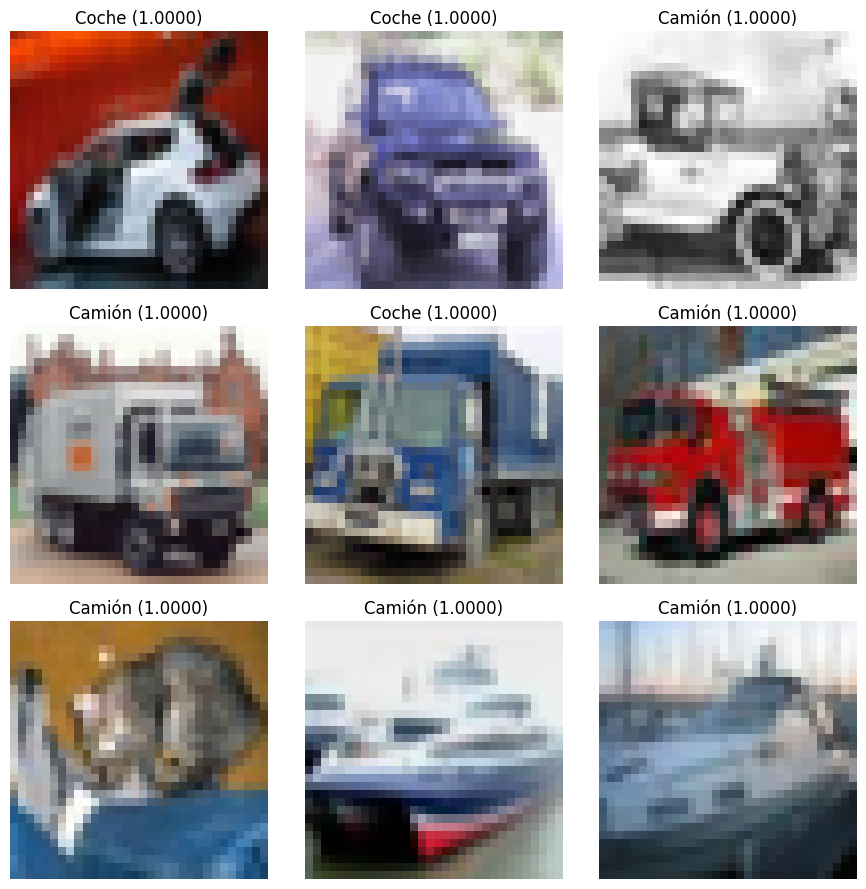

In [18]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de pruebas: {test_accuracy:.4f}')

# Mostrar predicciones de prueba para coches, camiones y otras clases
car_indices = [i for i, label in enumerate(test_labels) if np.argmax(label) == 1][:3]
truck_indices = [i for i, label in enumerate(test_labels) if np.argmax(label) == 2][:3]
other_indices = [i for i, label in enumerate(test_labels) if np.argmax(label) == 0][:3]

# Tomar algunas imágenes de cada clase
test_images_subset = [test_images[i] for i in (car_indices + truck_indices + other_indices)]
predictions = model.predict(np.array(test_images_subset))
show_images_with_predictions(test_images_subset, predictions)

# Modelo para todas las clases

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Función para mostrar imágenes con predicciones
def show_images_with_predictions(images, predictions, true_labels, columns=3):
    rows = math.ceil(len(images) / columns)
    fig, axs = plt.subplots(rows, columns, figsize=(columns * 4, rows * 4))
    axs = axs.flatten()

    cifar10_labels = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
                      'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

    for i in range(len(images)):
        axs[i].imshow(images[i])
        pred_label = np.argmax(predictions[i])  # Índice de la clase predicha
        true_label = true_labels[i]
        pred_class = cifar10_labels[pred_label]
        true_class = cifar10_labels[true_label]
        prob = np.max(predictions[i])  # Probabilidad de la clase predicha
        axs[i].set_title(f"Predicción: {pred_class} ({prob:.4f})\nReal: {true_class}")
        axs[i].axis('off')

    for i in range(len(images), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

In [ ]:


# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalizar imágenes
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convertir etiquetas a one-hot encoding
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)


In [ ]:

# Definir el modelo de la red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida con activación softmax para 10 clases
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
!ls

cars_model.keras  sample_data


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con el callback
history = model.fit(train_images, train_labels_one_hot, epochs=35, batch_size=64,
                    validation_data=(test_images, test_labels_one_hot),
                    callbacks=[early_stopping])


Epoch 1/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7923 - loss: 0.6004 - val_accuracy: 0.7149 - val_loss: 0.8647
Epoch 2/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8071 - loss: 0.5556 - val_accuracy: 0.7143 - val_loss: 0.8663
Epoch 3/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8167 - loss: 0.5209 - val_accuracy: 0.7097 - val_loss: 0.8967
Epoch 4/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8253 - loss: 0.5011 - val_accuracy: 0.7070 - val_loss: 0.9452
Epoch 5/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8287 - loss: 0.4838 - val_accuracy: 0.7197 - val_loss: 0.8933
Epoch 6/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8442 - loss: 0.4435 - val_accuracy: 0.7173 - val_loss: 0.9388
Epoch 7/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8544 - loss: 0.4148 - val_accuracy: 0.7103 - val_loss: 0.9470
Epoch 8/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8642 - loss: 0.3891 - val_accuracy: 0.

In [ ]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f'Precisión en el conjunto de pruebas: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6895 - loss: 2.3099
Precisión en el conjunto de pruebas: 0.6831


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


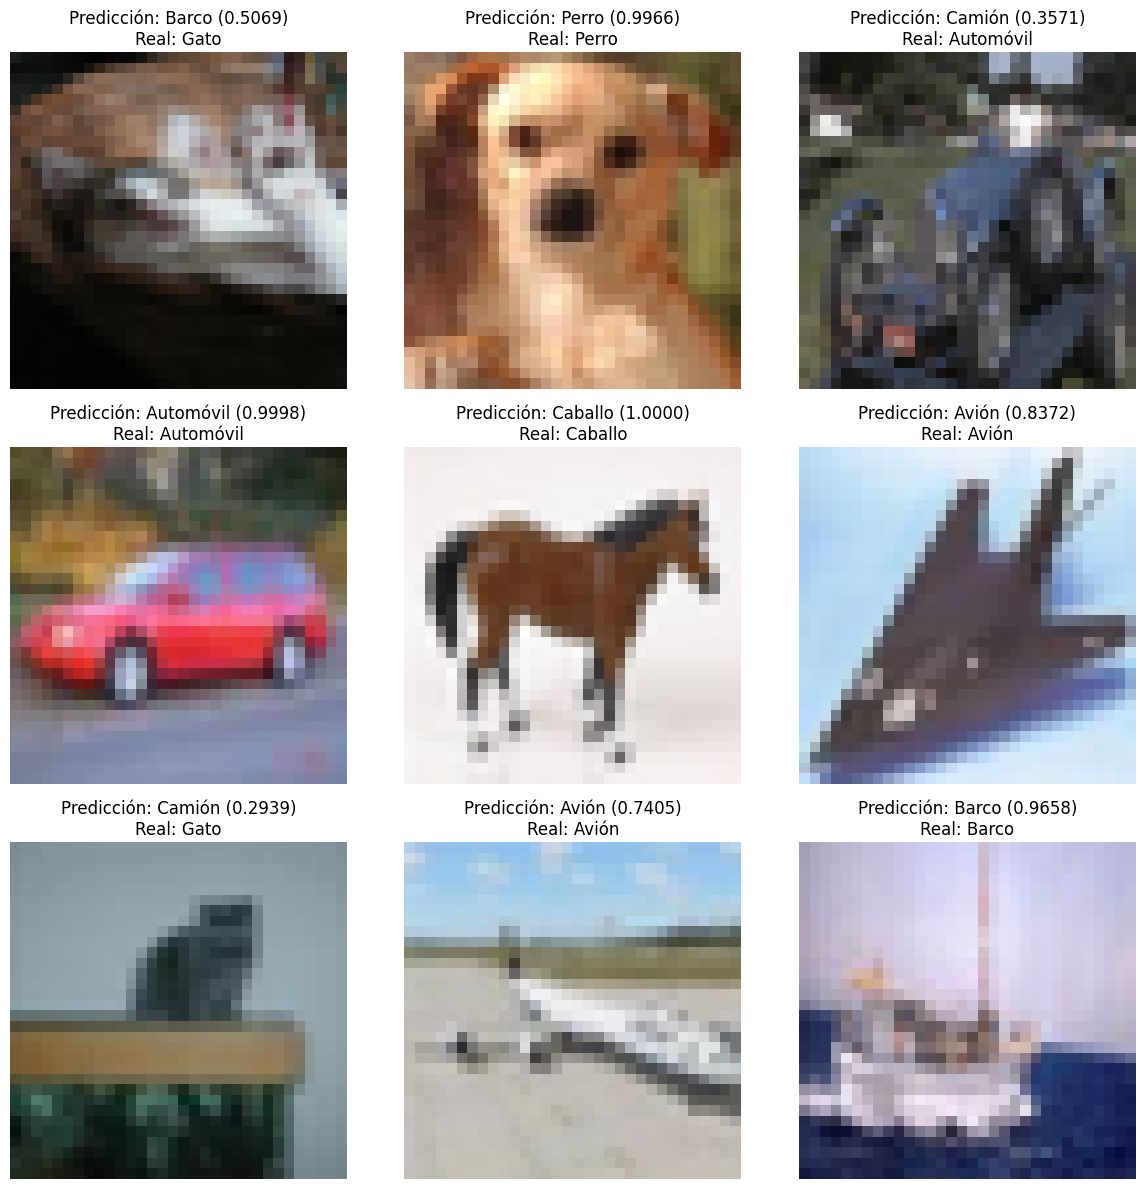

In [ ]:
# Mostrar algunas predicciones
random_indices = random.sample(range(len(test_images)), 9)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]
predictions = model.predict(sample_images)

# Mostrar las imágenes con las predicciones
show_images_with_predictions(sample_images, predictions, sample_labels.flatten())